In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [90]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [91]:
x=df.drop(' loan_status',axis=1)
y=df[' loan_status']

In [9]:
x.shape

(4269, 12)

In [10]:
y.shape

(4269,)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3415, 12)
(854, 12)
(3415,)
(854,)


In [93]:
categorical_features = [' education', ' self_employed']
numerical_features = x_train.select_dtypes(include=np.number).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [94]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
knn_model.score(x_train,y_train)

0.9256222547584187

In [31]:
knn_model.score(x_test,y_test)

0.8899297423887588

In [32]:
y_pred=knn_model.predict(x_test)
print(y_pred)

[' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Rejected' ' Rejected' ' Approved' ' Rejected' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' 

In [33]:
print(y_test)
print(y_pred)

1972     Approved
528      Approved
3540     Approved
87       Rejected
1621     Rejected
          ...    
1505     Approved
2423     Rejected
489      Rejected
2653     Approved
3881     Rejected
Name:  loan_status, Length: 854, dtype: object
[' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Rejected' 

In [45]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

In [46]:
print("precision is ",precision_score(y_test_encoded,y_pred_encoded))
print("recall is ",recall_score(y_test_encoded,y_pred_encoded))
print("f1 score is ",f1_score(y_test_encoded,y_pred_encoded))

precision is  0.8859934853420195
recall is  0.8217522658610272
f1 score is  0.8526645768025078


In [47]:
print(classification_report(y_test_encoded,y_pred_encoded))
print(accuracy_score(y_test_encoded,y_pred_encoded))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       523
           1       0.89      0.82      0.85       331

    accuracy                           0.89       854
   macro avg       0.89      0.88      0.88       854
weighted avg       0.89      0.89      0.89       854

0.8899297423887588


In [48]:
cm=confusion_matrix(y_test_encoded,y_pred_encoded)
print(cm)

[[488  35]
 [ 59 272]]


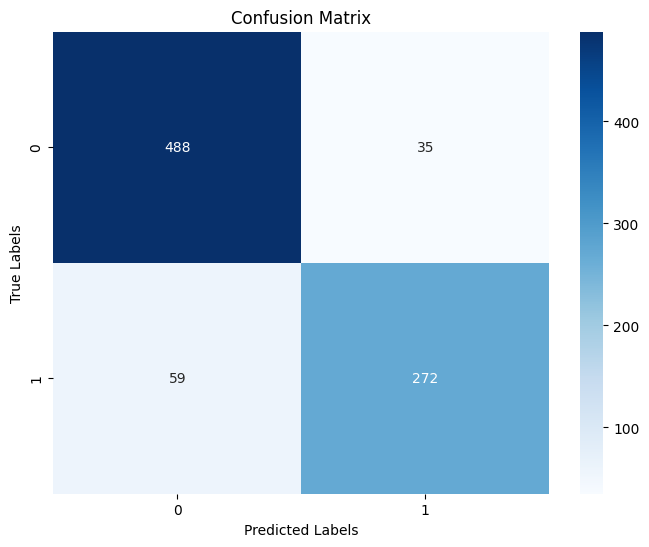

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

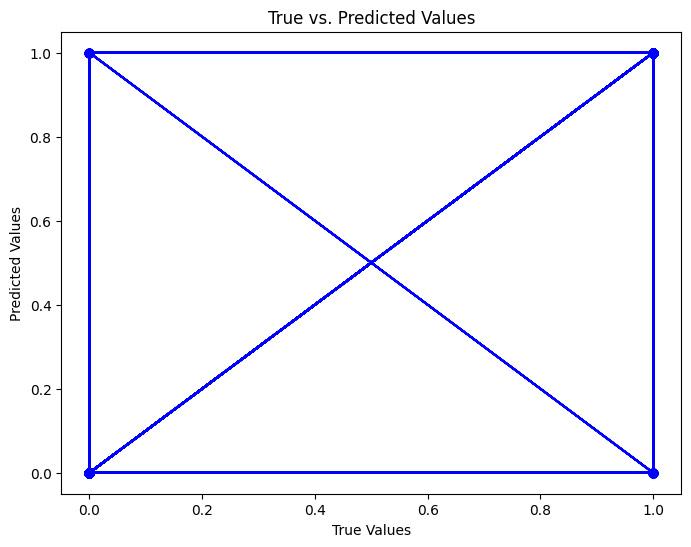

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(y_test_encoded, y_pred_encoded, marker='o', linestyle='-', color='b')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

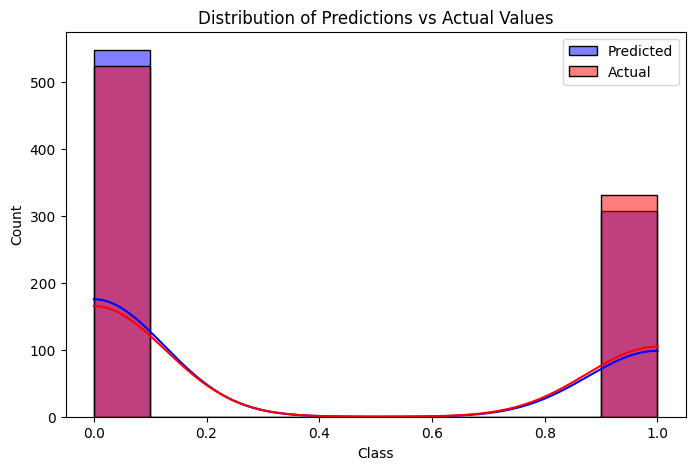

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_encoded, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test_encoded, color='red', label="Actual", alpha=0.5, bins=10, kde=True)
plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show

#Bonus

In [95]:
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

In [75]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [76]:
log_model.score(x_train,y_train)

0.9322550398499766

In [77]:
log_model.score(x_test,y_test)

0.9320843091334895

In [78]:
y_pred=log_model.predict(x_test)
print(y_pred)

[' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' 

In [79]:
print(y_test)
print(y_pred)

1972     Approved
528      Approved
3540     Approved
87       Rejected
1621     Rejected
          ...    
1505     Approved
2423     Rejected
489      Rejected
2653     Approved
3881     Rejected
Name:  loan_status, Length: 854, dtype: object
[' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Approved' 

In [80]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

In [81]:
print("precision is ",precision_score(y_test_encoded,y_pred_encoded))
print("recall is ",recall_score(y_test_encoded,y_pred_encoded))
print("f1 score is ",f1_score(y_test_encoded,y_pred_encoded))

precision is  0.8888888888888888
recall is  0.9425981873111783
f1 score is  0.9149560117302052


In [82]:
print(classification_report(y_test_encoded,y_pred_encoded))
print(accuracy_score(y_test_encoded,y_pred_encoded))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       523
           1       0.89      0.94      0.91       331

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

0.9320843091334895


In [83]:
cm=confusion_matrix(y_test_encoded,y_pred_encoded)
print(cm)

[[484  39]
 [ 19 312]]


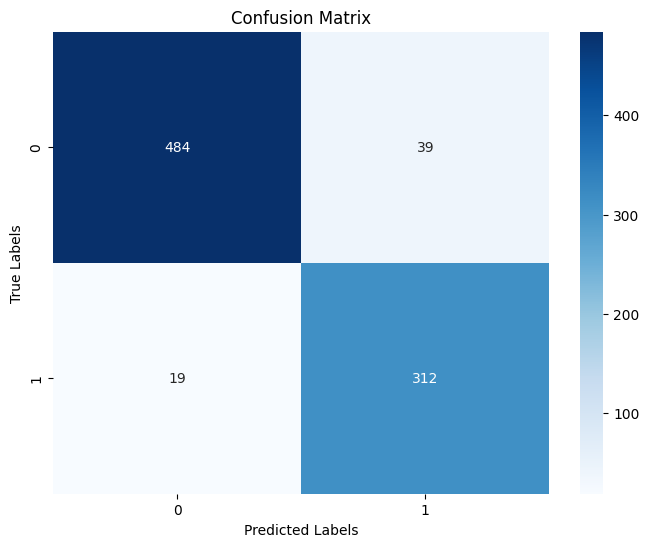

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

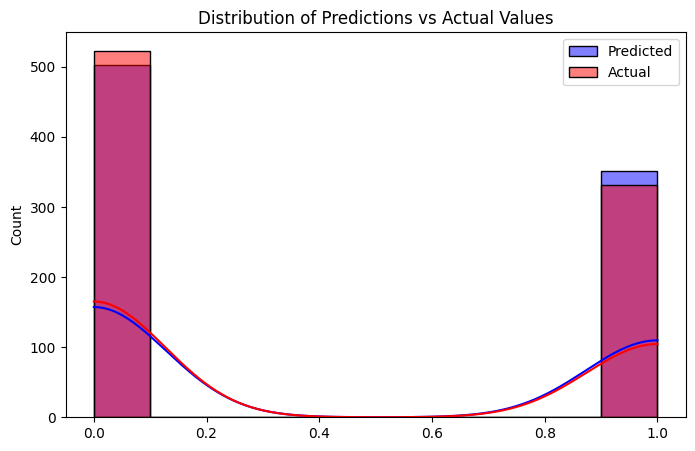

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_encoded, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test_encoded, color='red', label="Actual", alpha=0.5, bins=10, kde=True)
plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show()


In [96]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
dt_model.score(x_train,y_train)

1.0

In [98]:
dt_model.score(x_test,y_test)

0.9718969555035128

In [99]:
y_pred=dt_model.predict(x_test)
print(y_pred)

[' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' 

In [100]:
print(y_test)
print(y_pred)

1972     Approved
528      Approved
3540     Approved
87       Rejected
1621     Rejected
          ...    
1505     Approved
2423     Rejected
489      Rejected
2653     Approved
3881     Rejected
Name:  loan_status, Length: 854, dtype: object
[' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' 

In [101]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

In [102]:
print("precision is ",precision_score(y_test_encoded,y_pred_encoded))
print("recall is ",recall_score(y_test_encoded,y_pred_encoded))
print("f1 score is ",f1_score(y_test_encoded,y_pred_encoded))

precision is  0.960960960960961
recall is  0.9667673716012085
f1 score is  0.963855421686747


In [103]:
print(classification_report(y_test_encoded,y_pred_encoded))
print(accuracy_score(y_test_encoded,y_pred_encoded))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       523
           1       0.96      0.97      0.96       331

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

0.9718969555035128


In [104]:
cm=confusion_matrix(y_test_encoded,y_pred_encoded)
print(cm)

[[510  13]
 [ 11 320]]


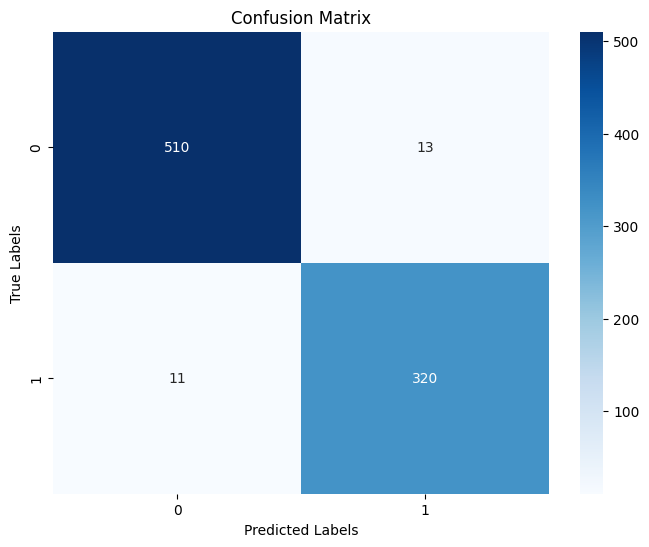

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [106]:
print(dt_model.feature_importances_)

[0.         0.         0.         0.00154557 0.00861496 0.00437382
 0.0277858  0.02811268 0.05113835 0.86620353 0.00289903 0.00378784
 0.00347558 0.00206282]


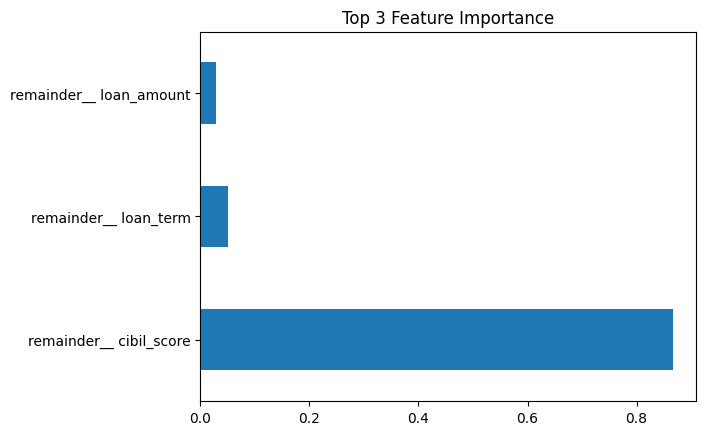

In [112]:
feature_names = preprocessor.get_feature_names_out()

feature_importance = pd.Series(dt_model.feature_importances_, index=feature_names)
feature_importance.nlargest(3).plot(kind='barh')
plt.title("Top 3 Feature Importance")
plt.show()

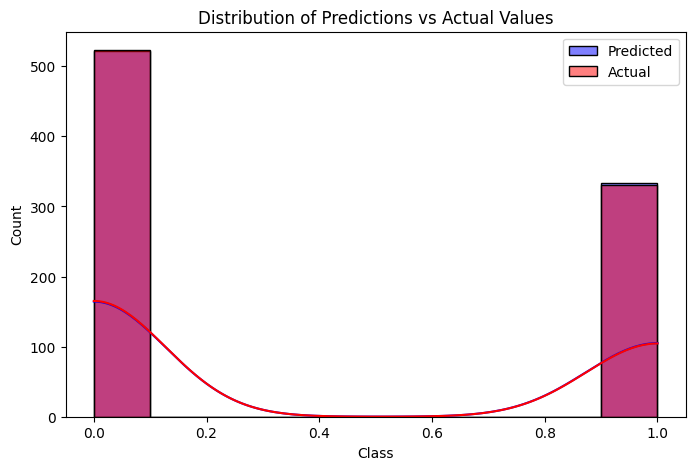

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_encoded, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test_encoded, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()